<a href="https://colab.research.google.com/github/Sharonkimani/Salary-regression-task/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('/content/Salary_dataset.csv', index_col=0)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [3]:
data.info(memory_usage='deep')
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes
0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


My data has 2 numerical columns and the data doesn't have any missing values nor any duplicates.


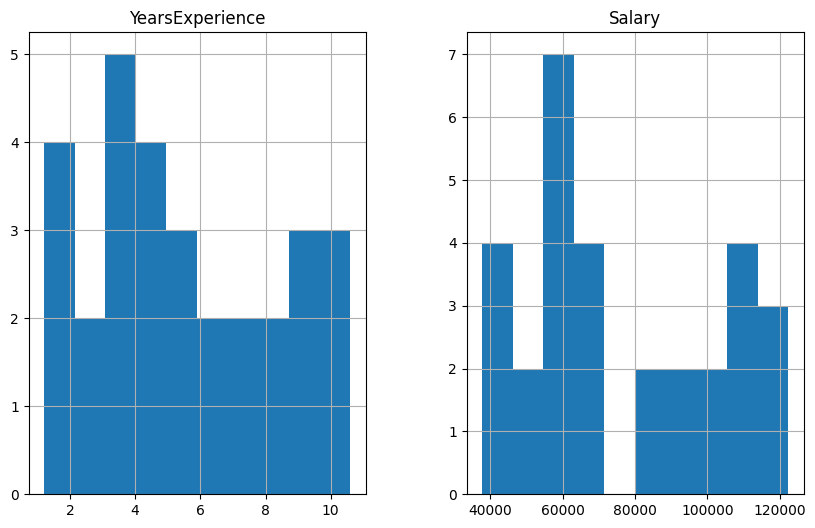

In [5]:
data.hist(figsize=(10,6));

From the histograms we can see that from our data, most of the employees have 3-4 years experience followed by 1-2 years experience and 4-5 years experience. Most of the employees in this dataset earn between 55000-65000 shillings.

## Modelling

In [6]:
X= data[['Salary']]
y= data.drop('Salary', axis=1)
from sklearn.preprocessing import StandardScaler


X_train , X_test, y_train, y_test= train_test_split(X, y, random_state=24, test_size=0.3)

## Baseline model
A simple linear regression model.

In [7]:
baseline= LinearRegression()
baseline.fit(X_train, y_train)
y_pred= baseline.predict(X_test)
##evaluate the model using r2 and mse/rmse
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse= mean_squared_error(y_test, y_pred, squared=False)
print('Mean squared error:', mse)
print('R squared:', r2)
print('Root mean squared error:', rmse)

Mean squared error: 0.4686402422167773
R squared: 0.9270535769638361
Root mean squared error: 0.6845730364371484


The baseline model has an R squared of 93% which says that the predictor variable ,years of experience, explains 93% of the total variation in the target variable.
The model has an rmse of 0.685 which means that the predictions sre off by 0.68 which is not bad.

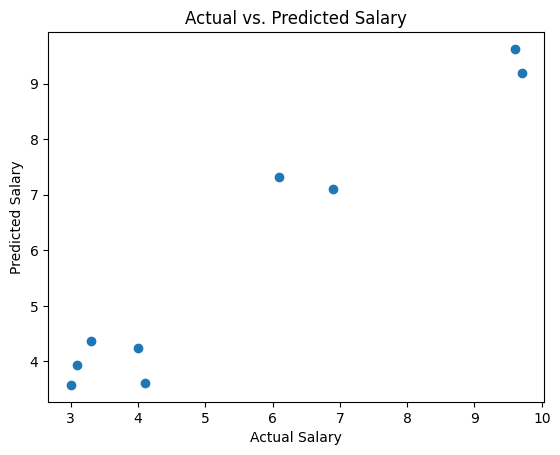

In [8]:
# If you want to visualize the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()


In [9]:
from sklearn.linear_model import Ridge  # Ridge regression includes regularization
from sklearn.model_selection import  GridSearchCV

# Define the model
ridge = Ridge()

# Define the hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Adjust these values based on your requirements

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Use the best hyperparameters to train the final model
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best alpha: 0.1
Mean Squared Error: 0.4686402422192
R-squared: 0.927053576963459


On using the ridge model and using the linear regression model, the results are the same , so the final model is the simple linear regression model.